<a href="https://colab.research.google.com/github/pj0620/google-colab-notebooks/blob/main/cnn_by_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

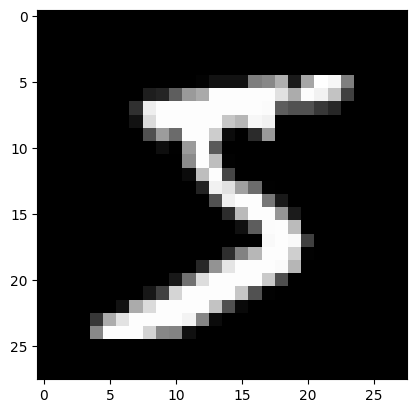

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

img = np.reshape(X_train[0],(28,28))
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
class ConvolutionLayer:
  def __init__(self, kernel_num, kernel_size):
    self.kernel_num = kernel_num
    self.kernel_size = kernel_size        
    self.kernels = np.random.randn(kernel_num, kernel_size, kernel_size) / (kernel_size**2)

  def patches_generator(self, image):
        image_h, image_w = image.shape
        self.image = image
        for h in range(image_h-self.kernel_size+1):
            for w in range(image_w-self.kernel_size+1):
                patch = image[h:(h+self.kernel_size), w:(w+self.kernel_size)]
                yield patch, h, w

  def forward_prop(self, image):
        image_h, image_w = image.shape
        convolution_output = np.zeros((image_h-self.kernel_size+1, image_w-self.kernel_size+1, self.kernel_num))
        for patch, h, w in self.patches_generator(image):
            convolution_output[h,w] = np.sum(patch*self.kernels, axis=(1,2))
        return convolution_output


cl = ConvolutionLayer(5, 14)
# cl.forward_prop(X_train[0])

self.kernel_size: 3


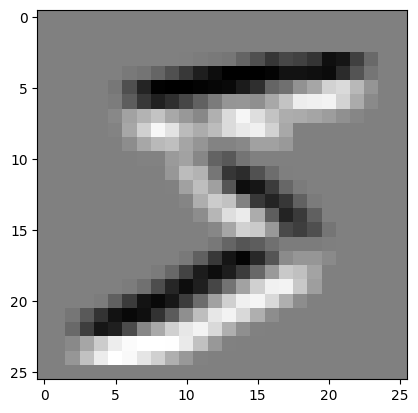

In [21]:
class HorizontalKernalTestLayer(ConvolutionLayer):
  def __init__(self):
    super().__init__(1, 3)
    self.kernels = np.array([[
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1],
    ]])

htl = HorizontalKernalTestLayer()
res = htl.forward_prop(X_train[0])
plt.imshow(np.squeeze(res, axis=-1), cmap='gray')
plt.show()

self.kernel_size: 3


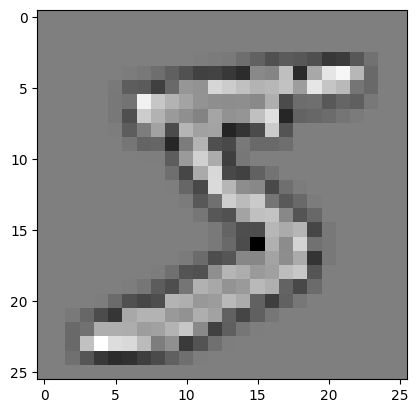

In [22]:
class CenterKernalTestLayer(ConvolutionLayer):
  def __init__(self):
    super().__init__(1, 3)
    self.kernels = np.array([[
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1],
    ]])

ctl = CenterKernalTestLayer()
res = ctl.forward_prop(X_train[0])
plt.imshow(np.squeeze(res, axis=-1), cmap='gray')
plt.show()